# PARKINSON DISEASE PREDICTION 

**IMORTING THE LIBRARIES**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import xlrd
from sklearn import metrics 
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv("dataset.csv")
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


**EXPLORATORY DATA ANALYSIS**

In [3]:
data.shape

(195, 24)

In [4]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [5]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
data.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [7]:
data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [8]:
data.count()

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      195
MDVP:Jitter(Abs)    195
MDVP:RAP            195
MDVP:PPQ            195
Jitter:DDP          195
MDVP:Shimmer        195
MDVP:Shimmer(dB)    195
Shimmer:APQ3        195
Shimmer:APQ5        195
MDVP:APQ            195
Shimmer:DDA         195
NHR                 195
HNR                 195
status              195
RPDE                195
DFA                 195
spread1             195
spread2             195
D2                  195
PPE                 195
dtype: int64

In [9]:
# 0 - >  Healthy 
# 1 -> PD 

**VISUALIZATION**

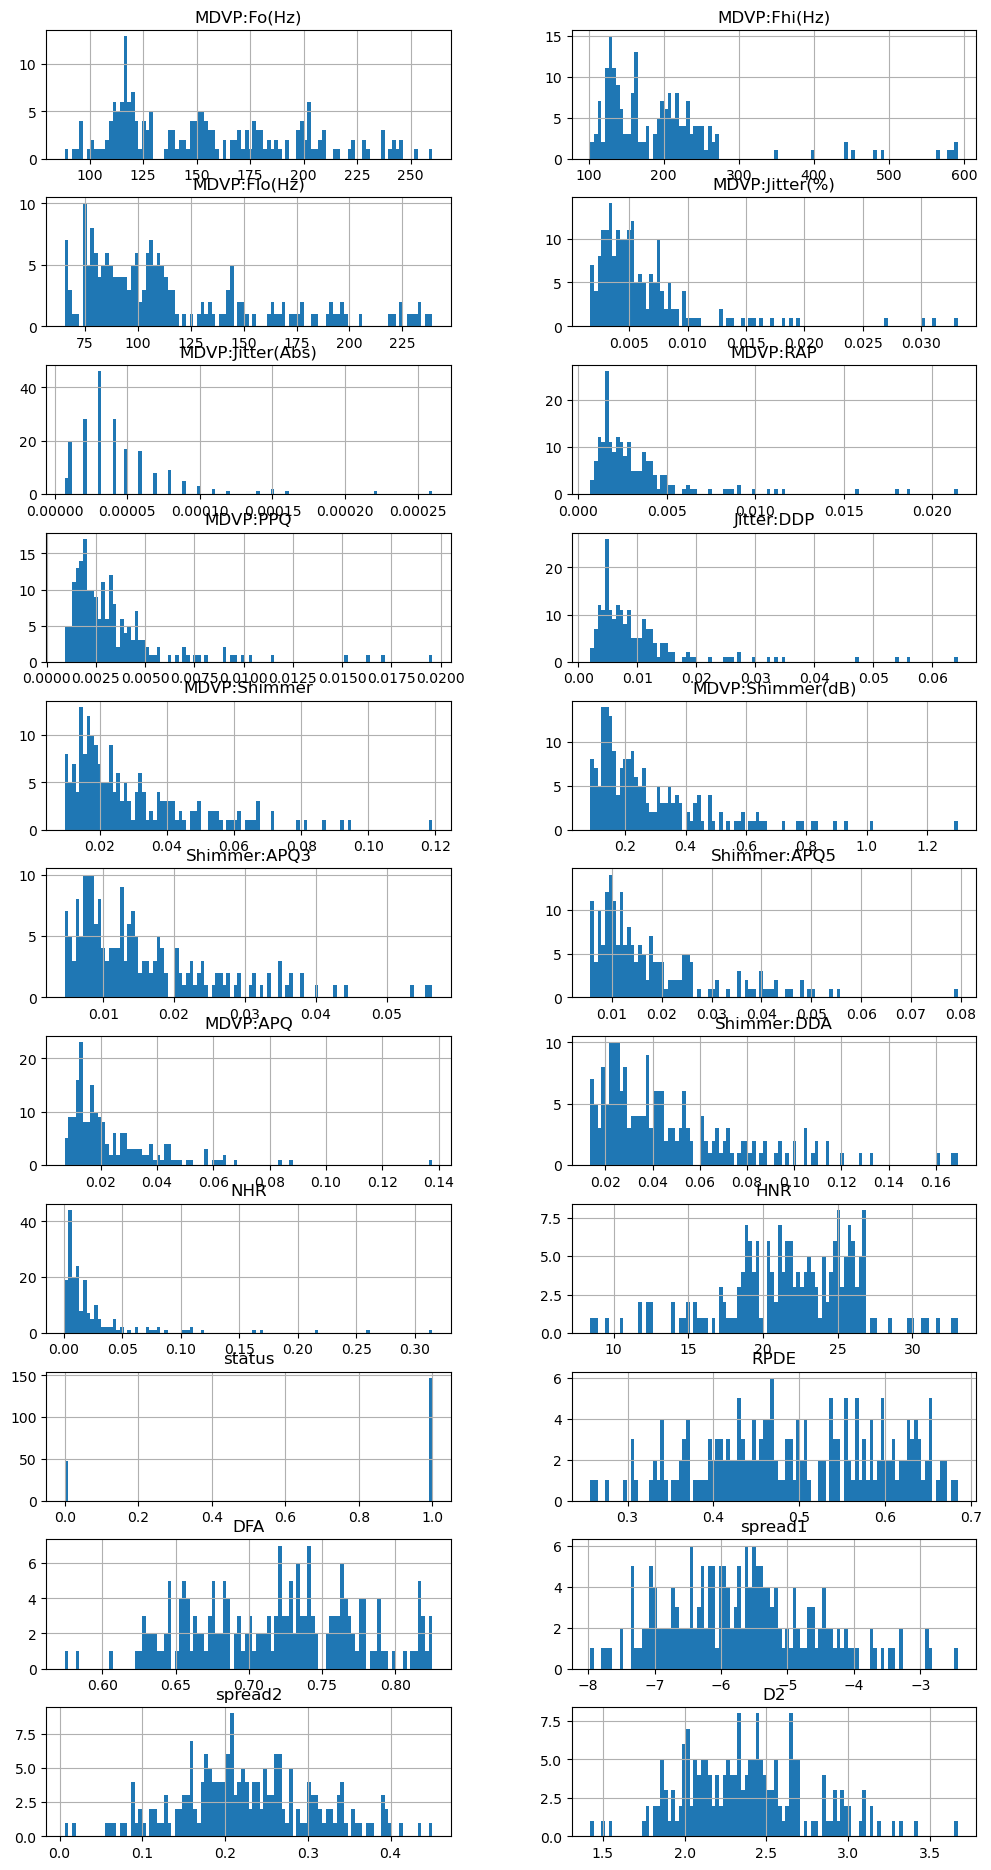

In [10]:
columns = list(data)[0:-1]
data[columns].hist(bins=100,figsize=(12,30),layout=(14,2));

**SPLITTING THE VARIABLE**

In [11]:
x = data.drop(['status','name'],axis = 1)
y = data['status']


In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

<IPython.core.display.Javascript object>

In [13]:
x_train.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
42,237.226,247.326,225.227,0.00298,0.00001,0.00169,0.00182,0.00507,0.01752,0.164,...,0.01133,0.03104,0.00740,22.736,0.305062,0.654172,-7.310550,0.098648,2.416838,0.095032
17,168.778,232.181,75.603,0.00718,0.00004,0.00284,0.00387,0.00853,0.03327,0.348,...,0.03430,0.04322,0.02919,20.376,0.631099,0.605417,-2.931070,0.434326,3.007463,0.430788
5,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,...,0.03243,0.06985,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
120,128.940,479.697,88.251,0.00581,0.00005,0.00241,0.00314,0.00723,0.02008,0.221,...,0.01734,0.02548,0.02350,24.743,0.487756,0.684130,-6.186128,0.279933,2.686240,0.152428
98,125.791,140.557,96.206,0.01378,0.00011,0.00826,0.00655,0.02478,0.04689,0.422,...,0.03908,0.07625,0.10323,15.433,0.571010,0.690892,-5.159169,0.202146,2.441612,0.260375


In [14]:
x_test.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
132,119.056,125.213,86.795,0.00346,0.00003,0.00169,0.00170,0.00508,0.01201,0.106,...,0.00915,0.01898,0.00903,23.389,0.470972,0.721308,-5.436135,0.254909,2.516320,0.232209
16,144.188,349.259,82.764,0.00544,0.00004,0.00211,0.00292,0.00632,0.02047,0.192,...,0.02074,0.02908,0.01859,22.333,0.567380,0.644692,-5.440040,0.239764,2.264501,0.218164
18,153.046,175.829,68.623,0.00742,0.00005,0.00364,0.00432,0.01092,0.05517,0.542,...,0.05767,0.07413,0.03160,17.280,0.665318,0.719467,-3.949079,0.357870,3.109010,0.377429
51,126.344,134.231,112.773,0.00448,0.00004,0.00131,0.00169,0.00393,0.02033,0.185,...,0.01614,0.03429,0.00474,25.030,0.507504,0.760361,-6.689151,0.291954,2.431854,0.105993
164,102.273,142.830,85.902,0.00907,0.00009,0.00493,0.00461,0.01480,0.02814,0.272,...,0.02073,0.04736,0.03882,18.447,0.671378,0.674562,-2.929379,0.396746,2.560422,0.367233


In [15]:
y_train.head()

42     0
17     1
5      1
120    1
98     1
Name: status, dtype: int64

In [16]:
y_test.head()

132    1
16     1
18     1
51     0
164    1
Name: status, dtype: int64

**MODEL BUILDING**

**NAIVE BAYEES**

In [17]:
from sklearn.naive_bayes import GaussianNB 

model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [18]:
naive_predict = model.predict(x_test)
naive_predict

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [19]:
print("Model accuracy :{0:.4f} %".format(metrics.accuracy_score(y_test,naive_predict)*100))

Model accuracy :71.1864 %


In [20]:
print("Classification report")
print(metrics.classification_report(y_test,naive_predict,labels=[1,0]))

Classification report
              precision    recall  f1-score   support

           1       0.96      0.60      0.74        40
           0       0.53      0.95      0.68        19

    accuracy                           0.71        59
   macro avg       0.74      0.77      0.71        59
weighted avg       0.82      0.71      0.72        59



**LOGISTIC REGRESSION**

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="liblinear")
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [22]:
logistic_predict = model.predict(x_test)
logistic_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [23]:
print("Model accuracy :{0:.4f} %".format(metrics.accuracy_score(y_test,logistic_predict)*100))

Model accuracy :81.3559 %


In [24]:
print("Classification report")
print(metrics.classification_report(y_test,logistic_predict,labels=[1,0]))

Classification report
              precision    recall  f1-score   support

           1       0.81      0.95      0.87        40
           0       0.83      0.53      0.65        19

    accuracy                           0.81        59
   macro avg       0.82      0.74      0.76        59
weighted avg       0.82      0.81      0.80        59



**RANDOM FOREST CLASSIFIER** 

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50 , random_state = 1 , max_features =12)
rfcl = rfcl.fit(x_train,y_train)

In [26]:
rfcl_predict = model.predict(x_test)
rfcl_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [27]:
print("Model accuracy :{0:.4f} %".format(metrics.accuracy_score(y_test,rfcl_predict)*100))

Model accuracy :81.3559 %


In [28]:
print("Classification report")
print(metrics.classification_report(y_test,rfcl_predict,labels=[1,0]))

Classification report
              precision    recall  f1-score   support

           1       0.81      0.95      0.87        40
           0       0.83      0.53      0.65        19

    accuracy                           0.81        59
   macro avg       0.82      0.74      0.76        59
weighted avg       0.82      0.81      0.80        59



**XG BOOST CLASSIFIER**

In [29]:
from xgboost import XGBClassifier
xgb = XGBClassifier() 
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [30]:
xgb_predict = model.predict(x_test)
xgb_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [31]:
y_predict = xgb.predict(x_test)
print(xgb.score(x_test,y_test))

0.8983050847457628


In [32]:
print("Model accuracy :{0:.4f} %".format(metrics.accuracy_score(y_test,xgb_predict)*100))

Model accuracy :81.3559 %


In [33]:
print("Classification report")
print(metrics.classification_report(y_test,xgb_predict,labels=[1,0]))

Classification report
              precision    recall  f1-score   support

           1       0.81      0.95      0.87        40
           0       0.83      0.53      0.65        19

    accuracy                           0.81        59
   macro avg       0.82      0.74      0.76        59
weighted avg       0.82      0.81      0.80        59

